In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from io import StringIO

Successfully loaded g₁ data from Table1.csv
Columns in g₁ data: ['X', 'G1', 'stat +', 'stat -', 'sys +', 'sys -']
Shape: (10, 6)
First row: {'X': 0.015, 'G1': 0.279, 'stat +': 0.361, 'stat -': -0.361, 'sys +': 0.106, 'sys -': -0.106}
--------------------------------------------------
Loaded g₁ data from Table1.csv: 10 data points


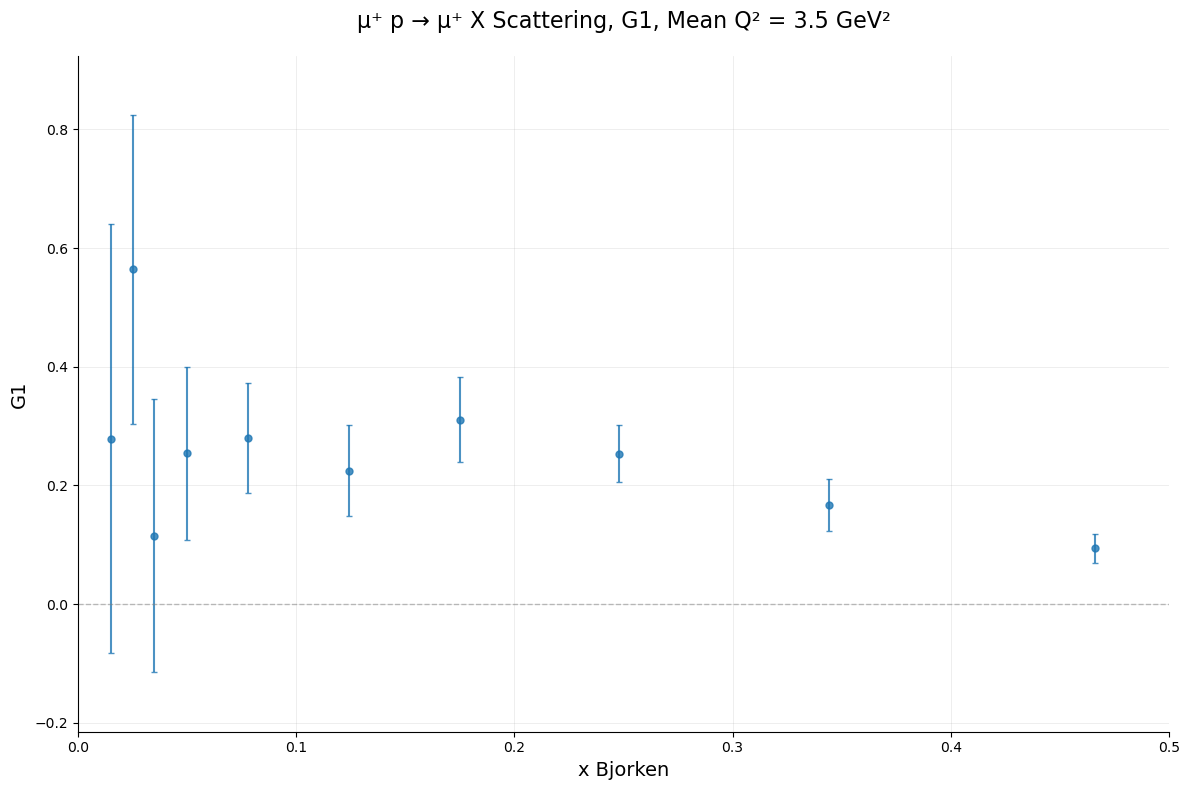

In [2]:
#Path, parse, plot, etc.
def plot_g1_data():
    """
    Plot g₁ᵖ data from Table1.csv for the reaction μ⁺ p → μ⁺ X, skipping A₁ data, using a single color and marker, with mean Q² in the title.
    """
    #Define directory and file
    directory = r"C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\EMC_data\HEPData-ins280143-v1-csv"
    filename = "Table1.csv"
    filepath = os.path.join(directory, filename)
    
    #Color and marker
    color = '#1f77b4'
    marker = 'o'
    
    #Aspect ratio
    plt.figure(figsize=(12, 8))
    
    #Read and parse the CSV file
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            lines = file.readlines()
        
        #Find the correct data section
        g1_section=[]
        in_g1_section=False
        for line in lines:
            line=line.strip()
            if not line:
                continue
            if line.startswith('#: RE,MU+ P --> MU+ X'):
                in_g1_section=False
                continue
            if line.startswith('X,G1,stat +,stat -,sys +,sys -'):
                in_g1_section=True
                g1_section.append(line)
                continue
            if in_g1_section and not line.startswith('#'):
                g1_section.append(line)
        
        if not g1_section:
            print(f"Error: No g₁ data section found in {filename}")
            return
        
        # Create DataFrame from G1 section
        df=pd.read_csv(StringIO('\n'.join(g1_section)), skipinitialspace=True)
        print(f"Successfully loaded g₁ data from {filename}")
    except Exception as e:
        print(f"Error loading {filename}: {str(e)}")
        return
    
    #Column names
    df.columns=df.columns.str.strip()
    
    #Debug: Print column names and first row
    print(f"Columns in g₁ data: {list(df.columns)}")
    print(f"Shape: {df.shape}")
    if len(df) > 0:
        print(f"First row: {df.iloc[0].to_dict()}")
    print("-" * 50)
    
    #Check for expected columns
    if 'X' not in df.columns or 'G1' not in df.columns:
        print(f"Error: Expected columns 'X' and 'G1' not found in {filename}")
        print(f"Available columns: {list(df.columns)}")
        return
    
    #Filter out invalid rows
    df = df.dropna(subset=['X', 'G1'])
    df = df[pd.to_numeric(df['X'], errors='coerce').notna()]
    df = df[pd.to_numeric(df['G1'], errors='coerce').notna()]
    
    #Convert to numeric
    df['X'] = pd.to_numeric(df['X'])
    df['G1'] = pd.to_numeric(df['G1'])
    
    #Handle error columns
    stat_pos=pd.to_numeric(df.get('stat +', 0), errors='coerce').fillna(0)
    stat_neg=pd.to_numeric(df.get('stat -', 0), errors='coerce').fillna(0)
    sys_pos=pd.to_numeric(df.get('sys +', 0), errors='coerce').fillna(0)
    sys_neg=pd.to_numeric(df.get('sys -', 0), errors='coerce').fillna(0)
    
    #Calculate total errors
    total_error_pos = np.sqrt(stat_pos**2)
    total_error_neg = np.sqrt(stat_neg**2)
    
    # Create error bars array
    yerr=[total_error_neg.abs(), total_error_pos]
    
    # Sort by X values
    df=df.sort_values('X')
    
    # Plot the data
    for x, g1, err_pos, err_neg in zip(df['X'], df['G1'], total_error_pos, total_error_neg):
        plt.errorbar(x, g1, 
                     yerr=[[err_neg], [err_pos]],
                     fmt=marker, 
                     color=color,
                     markersize=5,
                     capsize=2,
                     capthick=1,
                     linewidth=1.5,
                     alpha=0.8)
    
    # Add zero reference line
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    
    # Formatting
    plt.xlabel('x Bjorken', fontsize=14)
    plt.ylabel('G1', fontsize=14)
    plt.title('μ⁺ p → μ⁺ X Scattering, G1, Mean Q² = 3.5 GeV²', fontsize=16, pad=20)
    
    # Grid styling
    plt.grid(True, alpha=0.3, linewidth=0.5)
    
    # Set axis limits
    plt.xlim(0.0, 0.5)
    plt.ylim(min(df['G1'] - total_error_neg) - 0.1, max(df['G1'] + total_error_pos) + 0.1)
    
    # Adjust layout
    plt.tight_layout()
    
    # Styling improvements
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    
    print(f"Loaded g₁ data from {filename}: {len(df)} data points")
    
    plt.show()

if __name__ == "__main__":
    plot_g1_data()